### Name : Ghosh Kushanava Amitava
### Roll No : 220123083
### Course : MA 323

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Q.1

In [41]:
# Function to generate the Van Der Corput sequence for base b
def van_der_corput(n, base):
    seq = []
    for i in range(1, n+1):
        k = 0
        x = 0
        while i > 0:
            digit = i % base
            x += digit * (base ** -(k+1))
            i //= base
            k += 1
        seq.append(x)
    return seq

In [42]:
# Generate the first 25 values of the van der Corput sequence with base 2
A = van_der_corput(25, 2)

# Printing the first 25 values
print("First 25 values of the van der Corput sequence:")
for i, val in enumerate(A, 1):
    print(f"x{i} = {val}")

First 25 values of the van der Corput sequence:
x1 = 0.5
x2 = 0.25
x3 = 0.75
x4 = 0.125
x5 = 0.625
x6 = 0.375
x7 = 0.875
x8 = 0.0625
x9 = 0.5625
x10 = 0.3125
x11 = 0.8125
x12 = 0.1875
x13 = 0.6875
x14 = 0.4375
x15 = 0.9375
x16 = 0.03125
x17 = 0.53125
x18 = 0.28125
x19 = 0.78125
x20 = 0.15625
x21 = 0.65625
x22 = 0.40625
x23 = 0.90625
x24 = 0.09375
x25 = 0.59375


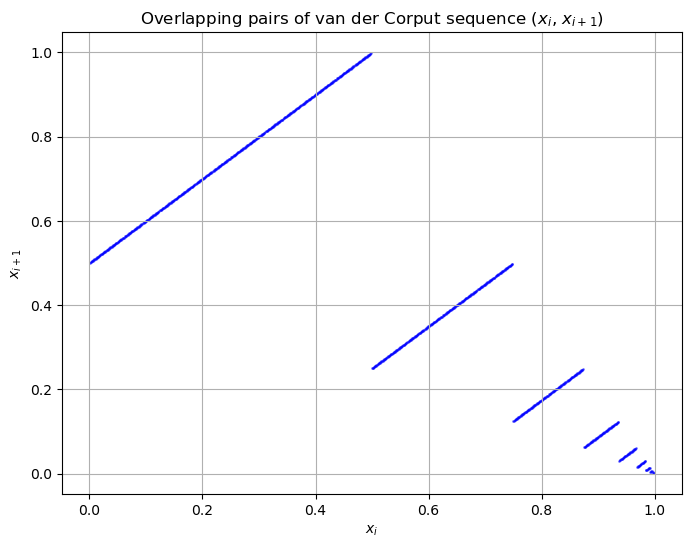

In [43]:
# Generating the first 1000 values of the van der Corput sequence with base 2
B = van_der_corput(1000, 2)

# Generating overlapping pairs (xi, xi+1)
x = B[:-1]
y = B[1:]

# Plotting the overlapping pairs (xi, xi+1)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=1, color='blue', alpha=0.5)
plt.title("Overlapping pairs of van der Corput sequence ($x_i$, $x_{i+1}$)")
plt.xlabel('$x_i$')
plt.ylabel('$x_{i+1}$')
plt.grid(True)
plt.show()

### Q.2

In [20]:
# Linear Congruential Generator (LCG)
def lcg(n, a=1664525, c=1013904223, m=2**32, seed=42):
    seq = []
    x = seed
    for _ in range(n):
        x = (a * x + c) % m
        seq.append(x / m)
    return seq

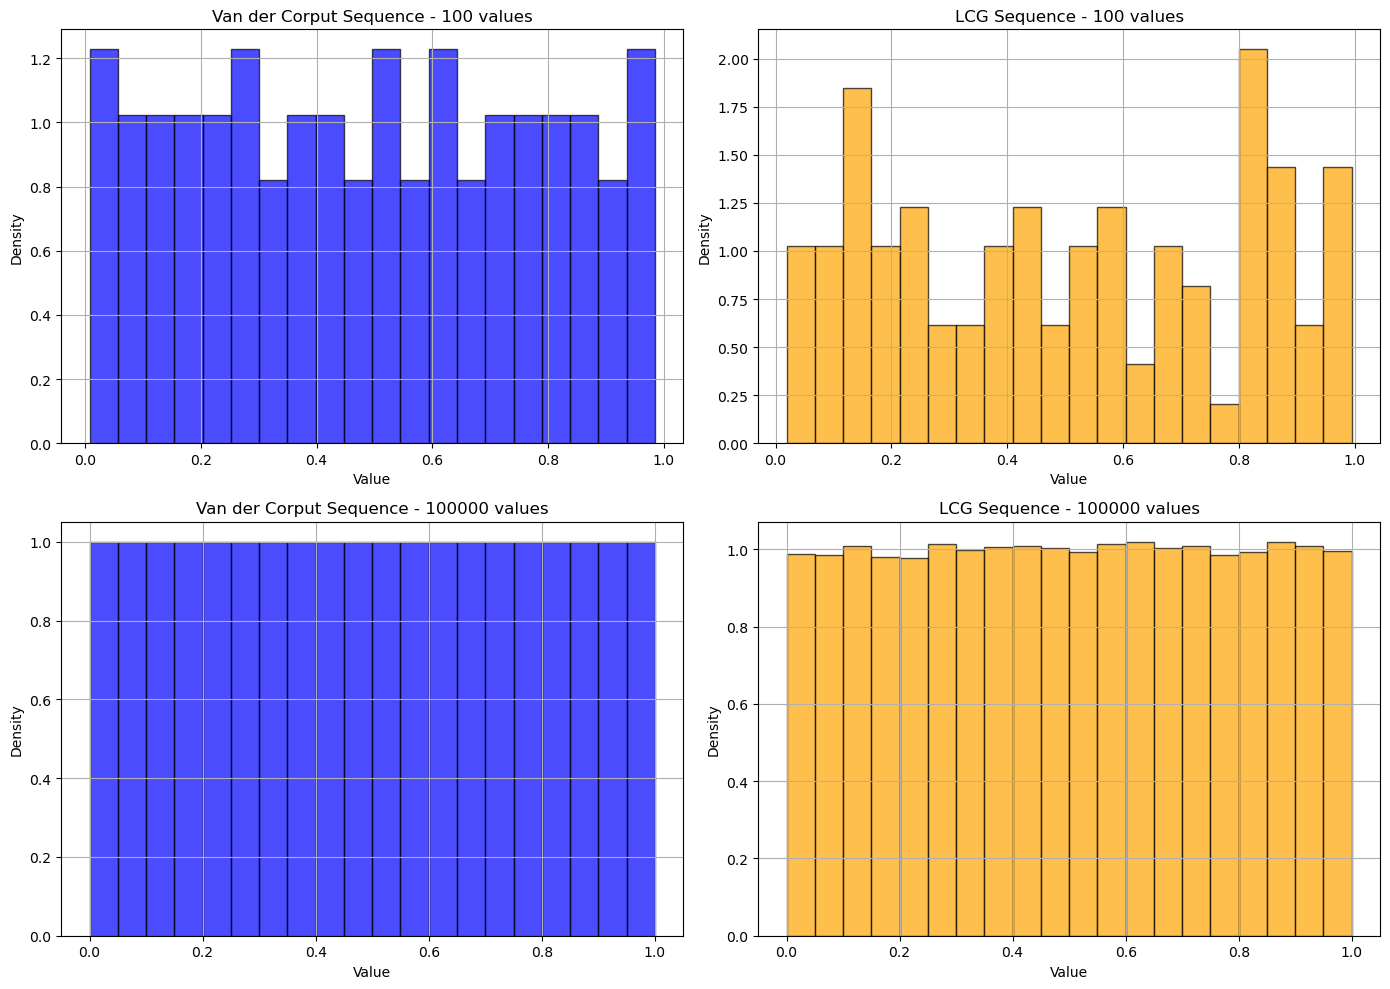

In [35]:
# Generating 100 and 100000 values for both sequences
samples = [100, 100000]

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, n in enumerate(samples):
    
    # Van der Corput sequence
    vdc_val = van_der_corput(n, 2)
    
    # LCG sequence
    lcg_val = lcg(n)

    # Plotting Van der Corput histogram
    ax_vdc = axes[i, 0]
    ax_vdc.hist(vdc_val, bins=20, density=True, color='blue', alpha=0.7, edgecolor='black')
    ax_vdc.set_title(f"Van der Corput Sequence - {n} values")
    ax_vdc.set_xlabel('Value')
    ax_vdc.set_ylabel('Density')
    ax_vdc.grid(True)

    # Plotting LCG histogram
    ax_lcg = axes[i, 1]
    ax_lcg.hist(lcg_val, bins=20, density=True, color='orange', alpha=0.7, edgecolor='black')
    ax_lcg.set_title(f"LCG Sequence - {n} values")
    ax_lcg.set_xlabel('Value')
    ax_lcg.set_ylabel('Density')
    ax_lcg.grid(True)

plt.tight_layout()
plt.show()

### Q.3

In [57]:
# Function to generate the Halton sequence for base b
def halton(n, base):
    result = []
    for i in range(n):
        x = 0
        k = 0
        while i > 0:
            digit = i % base
            x += digit * (base ** -(k+1))
            i //= base
            k += 1
        result.append(x)
    return np.array(result)

In [58]:
# Function to generate the Halton sequence in R2 with bases b1 and b2
def halton_matrix(n, base1, base2):
    x = halton(n, base1)
    y = halton(n, base2)
    return np.column_stack((x, y))

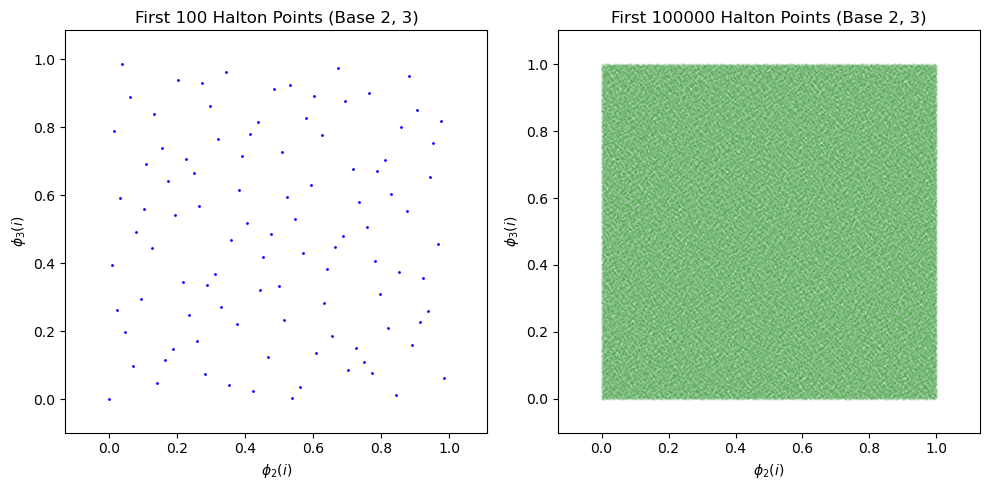

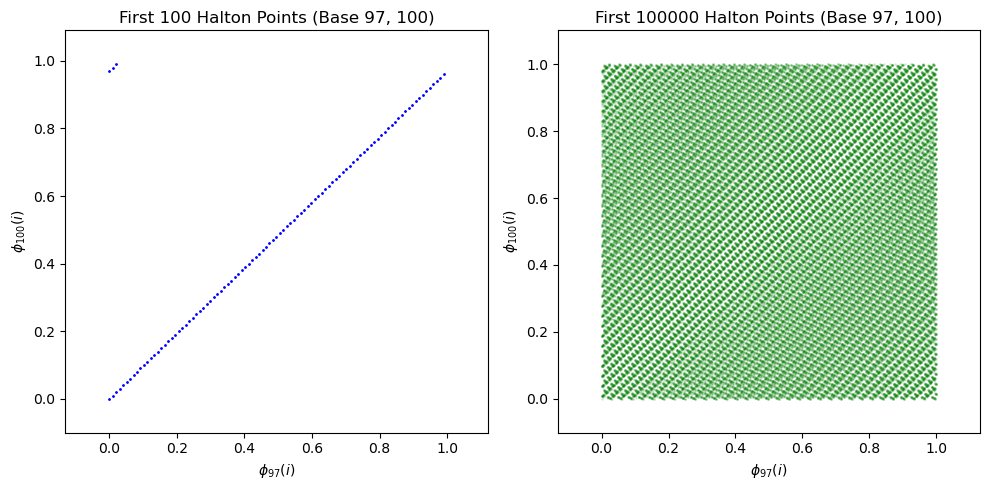

In [60]:
# Generate the first 100 and 100000 points
N = [100, 100000]

# Base values for the Halton sequence
base1, base2 = 2, 3
H = []
H.append(halton_matrix(N[0], base1, base2))
H.append(halton_matrix(N[1], base1, base2))

# Plotting the first 100 points
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(H[0][:, 0], H[0][:, 1], color='blue', s=1)
plt.title('First 100 Halton Points (Base 2, 3)')
plt.xlabel('$\phi_2(i)$')
plt.ylabel('$\phi_3(i)$')
plt.axis('equal')

# Plotting the first 100000 points
plt.subplot(1, 2, 2)
plt.scatter(H[1][:, 0], H[1][:, 1], color='green', s=1, alpha=0.1)
plt.title('First 100000 Halton Points (Base 2, 3)')
plt.xlabel('$\phi_2(i)$')
plt.ylabel('$\phi_3(i)$')
plt.axis('equal')

plt.tight_layout()
plt.show()

# Now generate points using larger bases, e.g., base 97 and 100
base1, base2 = 97, 100
L = []
L.append(halton_matrix(N[0], base1, base2))
L.append(halton_matrix(N[1], base1, base2))

# Plotting for larger bases
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(L[0][:, 0], L[0][:, 1], color='blue', s=1)
plt.title('First 100 Halton Points (Base 97, 100)')
plt.xlabel('$\phi_{97}(i)$')
plt.ylabel('$\phi_{100}(i)$')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(L[1][:, 0], L[1][:, 1], color='green', s=1, alpha=0.1)
plt.title('First 100000 Halton Points (Base 97, 100)')
plt.xlabel('$\phi_{97}(i)$')
plt.ylabel('$\phi_{100}(i)$')
plt.axis('equal')

plt.tight_layout()
plt.show()
